Question 1

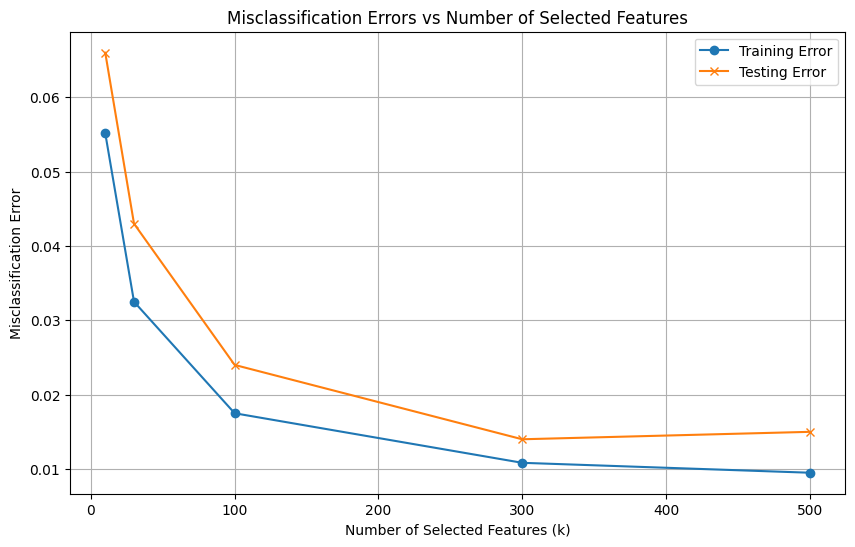

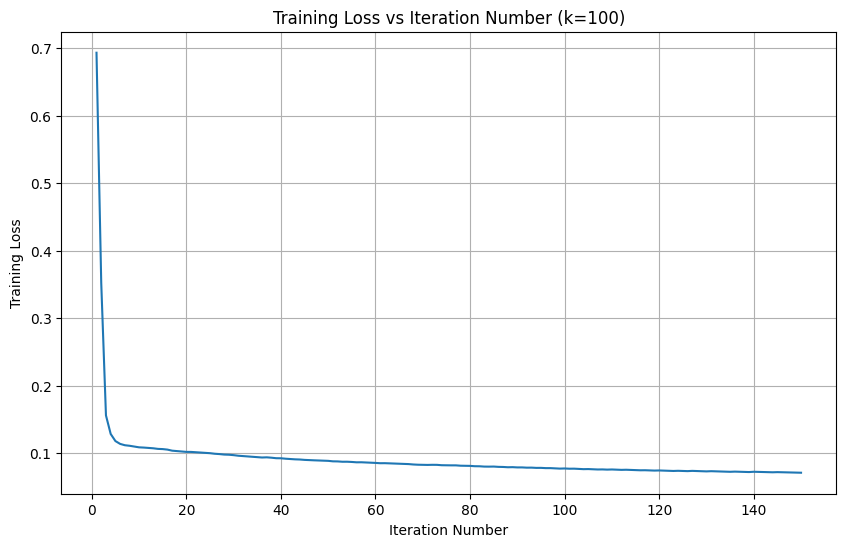

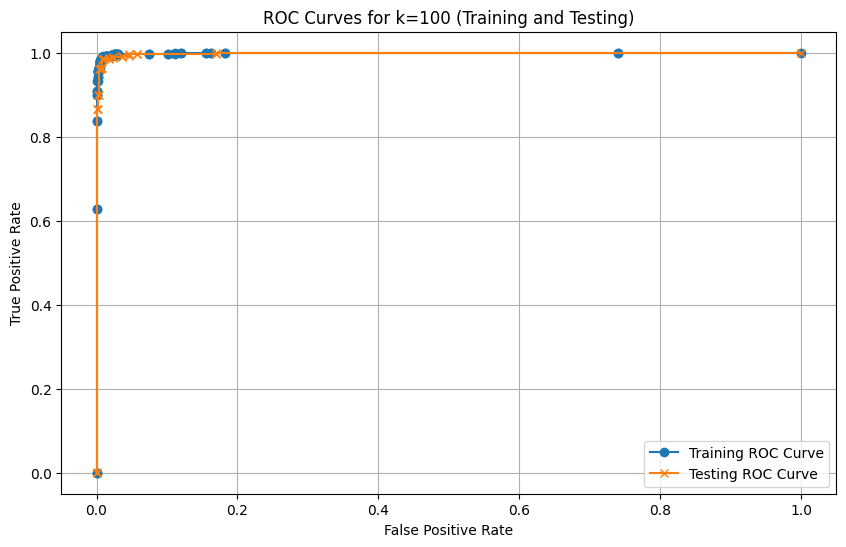

k	Training Error	Testing Error
10	0.0552		0.0660
30	0.0325		0.0430
100	0.0175		0.0240
300	0.0108		0.0140
500	0.0095		0.0150


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve

# Load data
x = np.loadtxt("gisette_train.data")
y = np.loadtxt("gisette_train.labels")
x_t = np.loadtxt("gisette_valid.data")
y_t = np.loadtxt("gisette_valid.labels")

# Normalize data
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_std = np.where(x_std == 0, 1, x_std)
x = (x - x_mean) / x_std
x_t = (x_t - x_mean) / x_std

# Parameters
s = 0.001
m = 300
k = [10, 30, 100, 300, 500]
N = x.shape[0]
M = x.shape[1]
eta = 0.2

# Lists to store errors and losses
train_errors = []
test_errors = []
train_loss = []

# Loop over different values of k
for j in range(len(k)):
    X_i = x
    x_t_i = x_t
    beta = np.zeros(x.shape[1])
    loss = []
    for i in range(1, 151):
        # Calculate logistic loss
        L = 1 / N * np.sum(np.log(1 + np.exp(-y * np.dot(X_i, beta)))) + s * np.dot(beta.T, beta)
        loss.append(L)
        # Update coefficients
        part = 1 + np.exp(y * np.dot(X_i, beta))
        beta = beta - eta * ((np.dot(X_i.T, -y / part)) / N + 2 * s * beta)
        # Update features
        Mi = k[j] + (M - k[j]) * max(0, (500 - 2 * i) / (2 * i * m + 500))
        Mi = int(Mi)
        sort = np.argsort(beta.T * beta)
        index = sort[-Mi:]
        beta = beta[index]
        X_i = X_i[:, index]
        x_t_i = x_t_i[:, index]
    # Calculate misclassification errors
    train_pred = np.where(np.dot(X_i, beta) > 0.0, 1, -1)
    train_err = 1 - accuracy_score(y, train_pred)
    test_pred = np.where(np.dot(x_t_i, beta) > 0.0, 1, -1)
    test_err = 1 - accuracy_score(y_t, test_pred)
    train_errors.append(train_err)
    test_errors.append(test_err)
    train_loss.append(loss)

# Plot misclassification errors vs k
plt.figure(figsize=(10, 6))
plt.plot(k, train_errors, marker='o', label='Training Error')
plt.plot(k, test_errors, marker='x', label='Testing Error')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Errors vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss vs iteration number for k=100
plt.figure(figsize=(10, 6))
plt.plot(range(1, 151), train_loss[2])  # k=100 is at index 2
plt.xlabel('Iteration Number')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iteration Number (k=100)')
plt.grid(True)
plt.show()

# Plot ROC curves for k=100
# Plot ROC curves for k=100 with both test and train
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, _ = roc_curve(y, np.dot(X_i, beta))
fpr_test, tpr_test, _ = roc_curve(y_t, np.dot(x_t_i, beta))
plt.plot(fpr_train, tpr_train, marker='o', label='Training ROC Curve')
plt.plot(fpr_test, tpr_test, marker='x', label='Testing ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for k=100 (Training and Testing)')
plt.legend()
plt.grid(True)
plt.show()


# Report misclassification errors on training and test set for all values of k
print("k\tTraining Error\tTesting Error")
for i in range(len(k)):
    print(f"{k[i]}\t{train_errors[i]:.4f}\t\t{test_errors[i]:.4f}")


Question 2

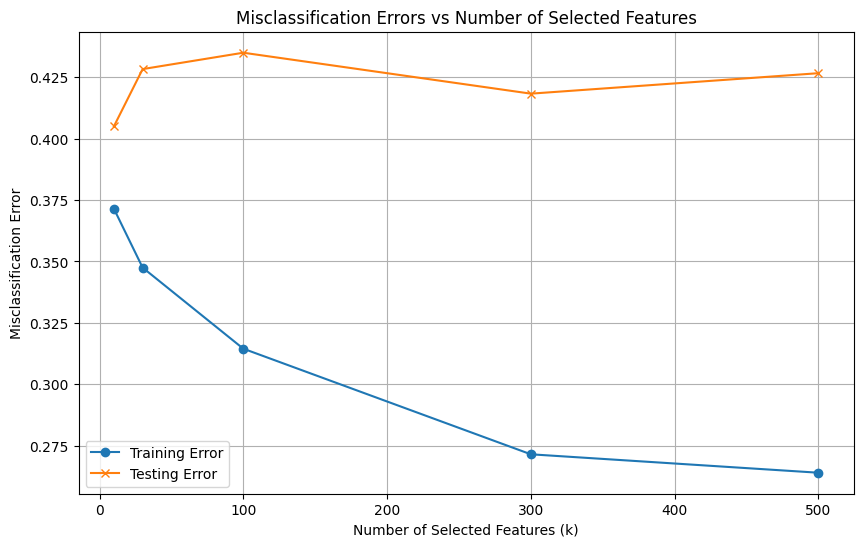

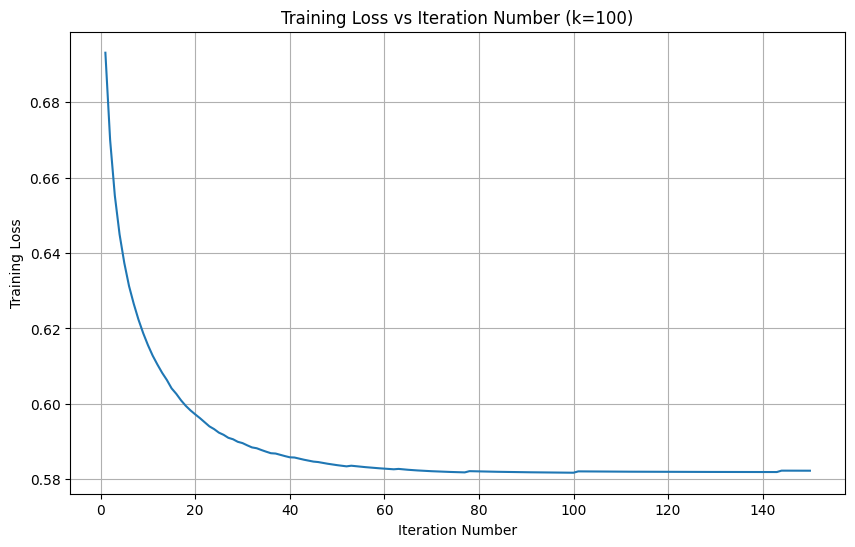

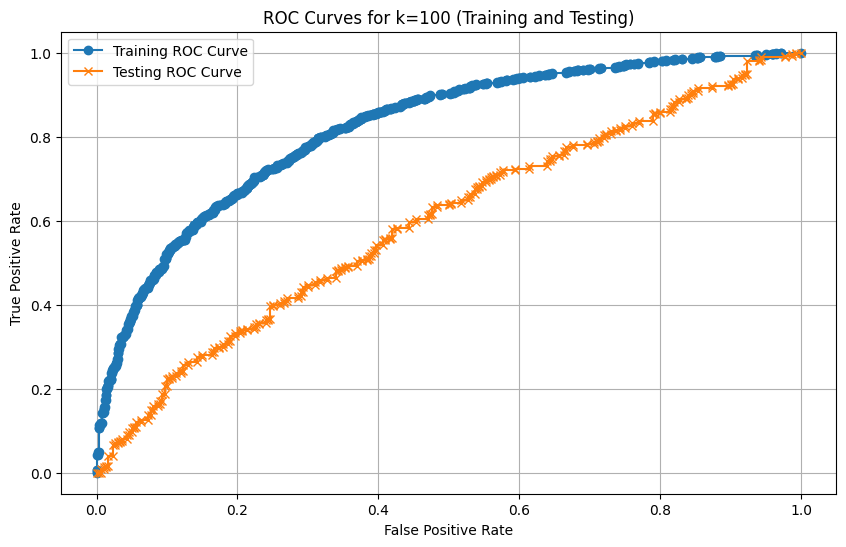

k	Training Error	Testing Error
10	0.3715		0.4050
30	0.3475		0.4283
100	0.3145		0.4350
300	0.2715		0.4183
500	0.2640		0.4267


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve

# Load data
x = np.loadtxt("madelon_train.data")
y = np.loadtxt("madelon_train.labels")
x_t = np.loadtxt("madelon_valid.data")
y_t = np.loadtxt("madelon_valid.labels")

# Normalize data
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_std = np.where(x_std == 0, 1, x_std)
x = (x - x_mean) / x_std
x_t = (x_t - x_mean) / x_std

# Parameters
s = 0.001
m = 300
k = [10, 30, 100, 300, 500]
N = x.shape[0]
M = x.shape[1]
eta = 0.2

# Lists to store errors and losses
train_errors = []
test_errors = []
train_loss = []

# Loop over different values of k
for j in range(len(k)):
    X_i = x
    x_t_i = x_t
    beta = np.zeros(x.shape[1])
    loss = []
    for i in range(1, 151):
        # Calculate logistic loss
        L = 1 / N * np.sum(np.log(1 + np.exp(-y * np.dot(X_i, beta)))) + s * np.dot(beta.T, beta)
        loss.append(L)
        # Update coefficients
        part = 1 + np.exp(y * np.dot(X_i, beta))
        beta = beta - eta * ((np.dot(X_i.T, -y / part)) / N + 2 * s * beta)
        # Update features
        Mi = k[j] + (M - k[j]) * max(0, (500 - 2 * i) / (2 * i * m + 500))
        Mi = int(Mi)
        sort = np.argsort(beta.T * beta)
        index = sort[-Mi:]
        beta = beta[index]
        X_i = X_i[:, index]
        x_t_i = x_t_i[:, index]
    # Calculate misclassification errors
    train_pred = np.where(np.dot(X_i, beta) > 0.0, 1, -1)
    train_err = 1 - accuracy_score(y, train_pred)
    test_pred = np.where(np.dot(x_t_i, beta) > 0.0, 1, -1)
    test_err = 1 - accuracy_score(y_t, test_pred)
    train_errors.append(train_err)
    test_errors.append(test_err)
    train_loss.append(loss)

# Plot misclassification errors vs k
plt.figure(figsize=(10, 6))
plt.plot(k, train_errors, marker='o', label='Training Error')
plt.plot(k, test_errors, marker='x', label='Testing Error')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Errors vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss vs iteration number for k=100
plt.figure(figsize=(10, 6))
plt.plot(range(1, 151), train_loss[2])  # k=100 is at index 2
plt.xlabel('Iteration Number')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iteration Number (k=100)')
plt.grid(True)
plt.show()

# Plot ROC curves for k=100
# Plot ROC curves for k=100 with both test and train
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, _ = roc_curve(y, np.dot(X_i, beta))
fpr_test, tpr_test, _ = roc_curve(y_t, np.dot(x_t_i, beta))
plt.plot(fpr_train, tpr_train, marker='o', label='Training ROC Curve')
plt.plot(fpr_test, tpr_test, marker='x', label='Testing ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for k=100 (Training and Testing)')
plt.legend()
plt.grid(True)
plt.show()


# Report misclassification errors on training and test set for all values of k
print("k\tTraining Error\tTesting Error")
for i in range(len(k)):
    print(f"{k[i]}\t{train_errors[i]:.4f}\t\t{test_errors[i]:.4f}")


Question 3

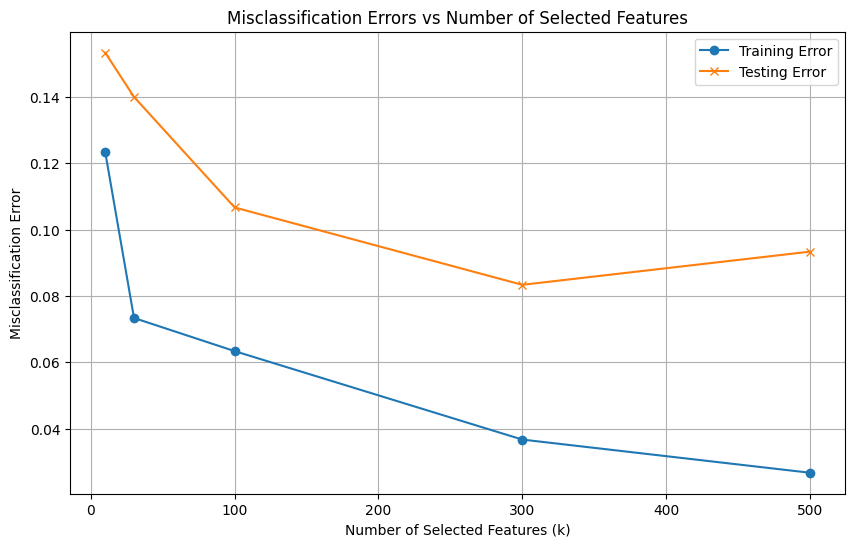

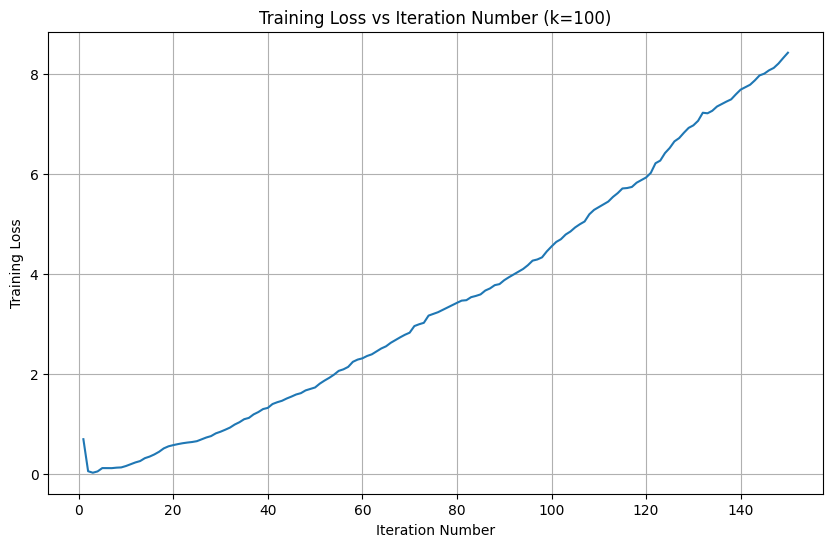

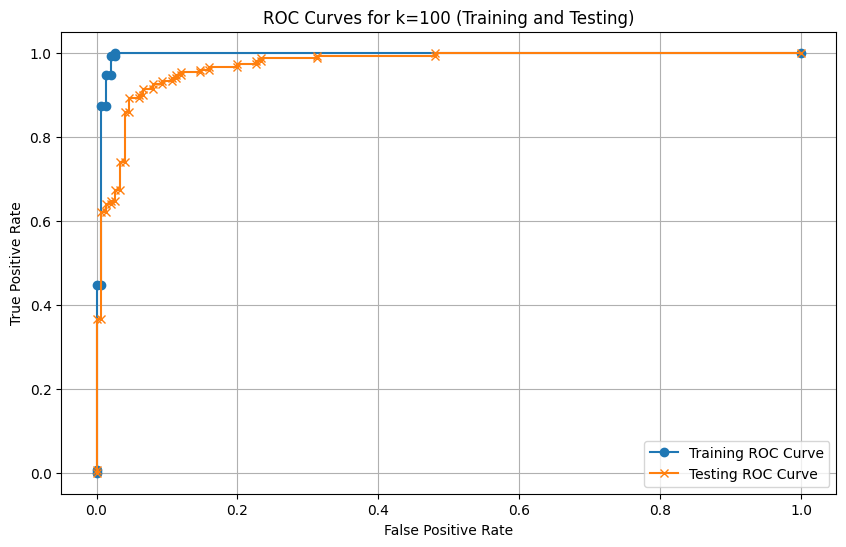

k	Training Error	Testing Error
10	0.1233		0.1533
30	0.0733		0.1400
100	0.0633		0.1067
300	0.0367		0.0833
500	0.0267		0.0933


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve

# Load data
x = pd.read_csv('dexter_train.csv', header = None)
y = pd.read_csv('dexter_train.labels', delim_whitespace=True, header=None )
x_t = pd.read_csv('dexter_valid.csv', header = None)
y_t = pd.read_csv('dexter_valid.labels',delim_whitespace=True, header=None)

# Normalize data
x_mean = np.mean(x, axis=0)
x_std = np.std(x, axis=0)
x_std = np.where(x_std == 0, 1, x_std)
x = (x - x_mean) / x_std
x_t = (x_t - x_mean) / x_std

# Parameters
s = 0.001
m = 300
k = [10, 30, 100, 300, 500]
N = x.shape[0]
M = x.shape[1]
eta = 0.2

# Lists to store errors and losses
train_errors = []
test_errors = []
train_loss = []

# Loop over different values of k
for j in range(len(k)):
    X_i = x
    x_t_i = x_t
    beta = np.zeros(x.shape[1])
    loss = []
    for i in range(1, 151):
        # Calculate logistic loss
        part = 1 + np.exp(-y.values.ravel() * np.dot(X_i, beta))
        L = 1 / N * np.sum(np.log(part)) + s * np.dot(beta.T, beta)
        loss.append(L)
        # Update coefficients
        beta = beta - eta * ((np.dot(X_i.T, -y.values.ravel() / part)) / N + 2 * s * beta)
        # Update features
        Mi = k[j] + (M - k[j]) * max(0, (500 - 2 * i) / (2 * i * m + 500))
        Mi = int(Mi)
        sort = np.argsort(beta.T * beta)
        index = sort[-Mi:]
        beta = beta[index]
        X_i = X_i.iloc[:, index]
        x_t_i = x_t_i.iloc[:, index.tolist()]
    # Calculate misclassification errors
    train_pred = np.where(np.dot(X_i, beta) > 0.0, 1, -1)
    train_err = 1 - accuracy_score(y, train_pred)
    test_pred = np.where(np.dot(x_t_i, beta) > 0.0, 1, -1)
    test_err = 1 - accuracy_score(y_t, test_pred)
    train_errors.append(train_err)
    test_errors.append(test_err)
    train_loss.append(loss)
# Plot misclassification errors vs k
plt.figure(figsize=(10, 6))
plt.plot(k, train_errors, marker='o', label='Training Error')
plt.plot(k, test_errors, marker='x', label='Testing Error')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Errors vs Number of Selected Features')
plt.legend()
plt.grid(True)
plt.show()

# Plot training loss vs iteration number for k=100
plt.figure(figsize=(10, 6))
plt.plot(range(1, 151), train_loss[2])  # k=100 is at index 2
plt.xlabel('Iteration Number')
plt.ylabel('Training Loss')
plt.title('Training Loss vs Iteration Number (k=100)')
plt.grid(True)
plt.show()

# Plot ROC curves for k=100
# Plot ROC curves for k=100 with both test and train
plt.figure(figsize=(10, 6))
fpr_train, tpr_train, _ = roc_curve(y, np.dot(X_i, beta))
fpr_test, tpr_test, _ = roc_curve(y_t, np.dot(x_t_i, beta))
plt.plot(fpr_train, tpr_train, marker='o', label='Training ROC Curve')
plt.plot(fpr_test, tpr_test, marker='x', label='Testing ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for k=100 (Training and Testing)')
plt.legend()
plt.grid(True)
plt.show()


# Report misclassification errors on training and test set for all values of k
print("k\tTraining Error\tTesting Error")
for i in range(len(k)):
    print(f"{k[i]}\t{train_errors[i]:.4f}\t\t{test_errors[i]:.4f}")